In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Input, Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from keras import losses
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [3]:
(train_data,train_label),(test_data,test_label)=cifar10.load_data()
print(train_data.shape,train_label.shape,test_data.shape,test_label.shape)
input_shape=(32,32,3)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
train_data=train_data.astype('float32')/255.0
test_data=test_data.astype('float32')/255.0
train_label=to_categorical(train_label)
test_label=to_categorical(test_label)
cnn_=Sequential(
    [Conv2D(32,kernel_size=3,activation='relu',strides=1,padding='same',input_shape=input_shape),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(32,kernel_size=3,activation='relu',strides=1,padding='same',input_shape=input_shape),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(32,kernel_size=3,activation='relu',strides=1,padding='same',input_shape=input_shape),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64,kernel_size=3,activation='relu',strides=1,padding='same',input_shape=input_shape),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64,kernel_size=3,activation='relu',strides=1,padding='same',input_shape=input_shape),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128,kernel_size=3,activation='relu',strides=1,padding='same',input_shape=input_shape),
    #MaxPooling2D((2,2)),
    Dropout(0.25),

    layers.Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.25),
    Dense(256,activation='relu'),
    Dropout(0.25),
    Dense(10,activation='softmax')
    ])
cnn_.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          9

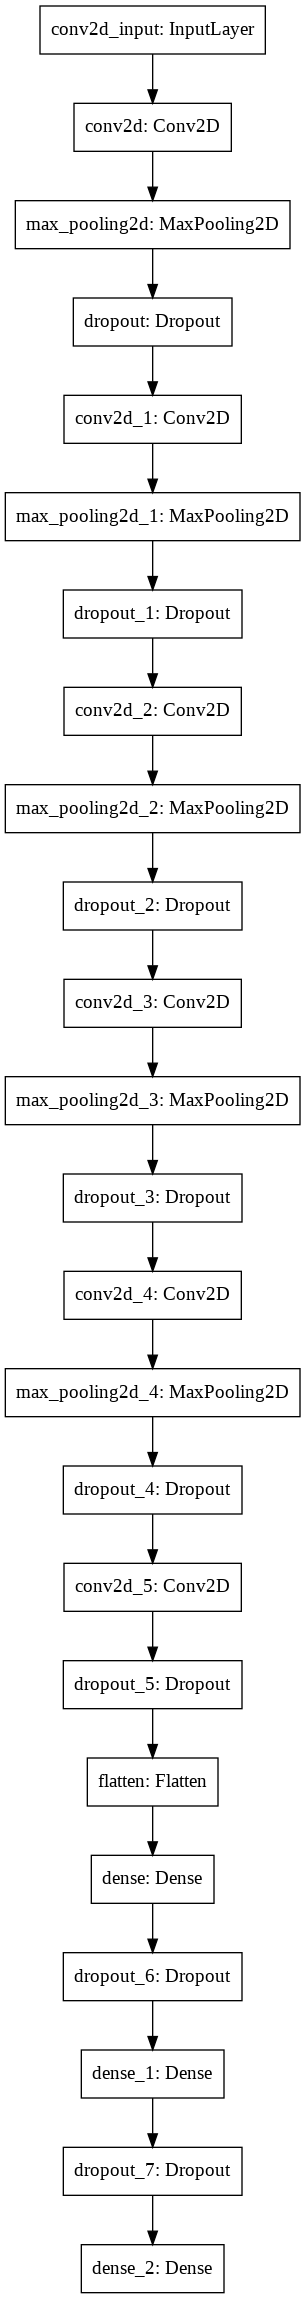

In [5]:
tf.keras.utils.plot_model(cnn_)

In [6]:
cnn_.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
hist=cnn_.fit(train_data,train_label,batch_size=64,epochs=5,verbose=1,validation_split=0.2,validation_data=(test_data,test_label))

Epoch 1/5
625/625 [==============================] - 36s 7ms/step - loss: 1.9789 - accuracy: 0.2219 - val_loss: 1.6754 - val_accuracy: 0.3423
Epoch 2/5
625/625 [==============================] - 4s 6ms/step - loss: 1.6633 - accuracy: 0.3615 - val_loss: 1.5182 - val_accuracy: 0.4171
Epoch 3/5
625/625 [==============================] - 4s 6ms/step - loss: 1.5419 - accuracy: 0.4228 - val_loss: 1.3862 - val_accuracy: 0.4871
Epoch 4/5
625/625 [==============================] - 4s 6ms/step - loss: 1.4675 - accuracy: 0.4613 - val_loss: 1.3180 - val_accuracy: 0.5174
Epoch 5/5
625/625 [==============================] - 4s 6ms/step - loss: 1.4163 - accuracy: 0.4841 - val_loss: 1.2564 - val_accuracy: 0.5501


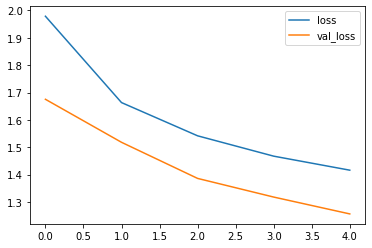

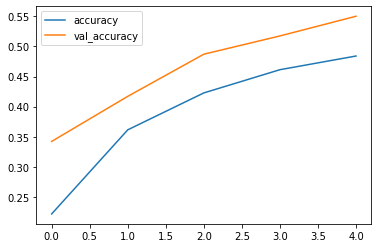

In [8]:
hist_frame=pd.DataFrame(hist.history)
hist_frame.loc[:,['loss','val_loss']].plot()
hist_frame.loc[:,['accuracy','val_accuracy']].plot()

In [9]:
res_mod=tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False,input_shape=input_shape)
res_out=res_mod.output
res_out = GlobalAveragePooling2D()(res_out)
res_out = Dropout(0.7)(res_out)

94773248/94765736 [==============================] - 1s 0us/step


In [10]:
output_fin=Dense(10,activation='softmax')(res_out)
model_1=Model(inputs=res_mod.input,outputs=output_fin)
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [19]:
hist1=model_1.fit(train_data,train_label,batch_size=64,epochs=5,verbose=1,validation_split=0.2,validation_data=(test_data,test_label))

Epoch 1/5
625/625 [==============================] - 31s 46ms/step - loss: 2.0985 - accuracy: 0.4361 - val_loss: 8.6698 - val_accuracy: 0.2893
Epoch 2/5
625/625 [==============================] - 29s 46ms/step - loss: 2.1491 - accuracy: 0.4180 - val_loss: 46.1457 - val_accuracy: 0.4130
Epoch 3/5
625/625 [==============================] - 30s 48ms/step - loss: 1.6746 - accuracy: 0.4863 - val_loss: 1.5258 - val_accuracy: 0.4742
Epoch 4/5
625/625 [==============================] - 30s 48ms/step - loss: 1.2517 - accuracy: 0.5745 - val_loss: 1.1065 - val_accuracy: 0.6096
Epoch 5/5
625/625 [==============================] - 30s 48ms/step - loss: 1.0982 - accuracy: 0.6233 - val_loss: 1.0568 - val_accuracy: 0.6368


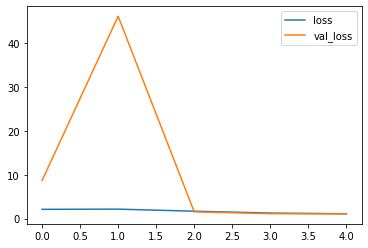

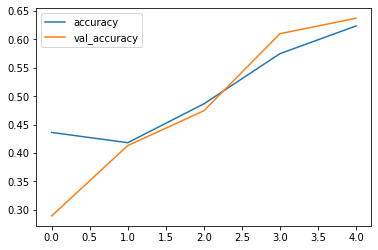

In [23]:
hist_frame1=pd.DataFrame(hist1.history)
hist_frame1.loc[:,['loss','val_loss']].plot()
hist_frame1.loc[:,['accuracy','val_accuracy']].plot()

In [31]:
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf
resnet50_imagenet_model = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
flattened = tf.keras.layers.Flatten()(resnet50_imagenet_model.output)
fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)
fc2 = tf.keras.layers.Dense(10, activation='softmax', name="AddedDense2")(fc1)
model_2 = tf.keras.models.Model(inputs=resnet50_imagenet_model.input, outputs=fc2)
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_2.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_16[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [32]:
hist2=model_2.fit(train_data,train_label,batch_size=64,epochs=5,verbose=1,validation_split=0.2,validation_data=(test_data,test_label))

Epoch 1/5
625/625 [==============================] - 34s 47ms/step - loss: 1.2932 - accuracy: 0.5634 - val_loss: 2.9482 - val_accuracy: 0.1702
Epoch 2/5
625/625 [==============================] - 29s 46ms/step - loss: 0.8301 - accuracy: 0.7202 - val_loss: 1.3324 - val_accuracy: 0.6034
Epoch 3/5
625/625 [==============================] - 29s 47ms/step - loss: 0.6794 - accuracy: 0.7729 - val_loss: 1.0222 - val_accuracy: 0.6738
Epoch 4/5
625/625 [==============================] - 29s 47ms/step - loss: 0.6491 - accuracy: 0.7847 - val_loss: 0.8460 - val_accuracy: 0.7261
Epoch 5/5
625/625 [==============================] - 30s 48ms/step - loss: 0.5244 - accuracy: 0.8252 - val_loss: 1.4979 - val_accuracy: 0.5907


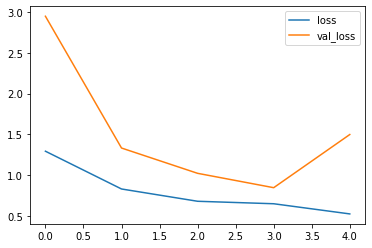

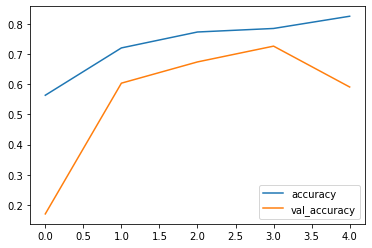

In [33]:
hist_frame2=pd.DataFrame(hist2.history)
hist_frame2.loc[:,['loss','val_loss']].plot()
hist_frame2.loc[:,['accuracy','val_accuracy']].plot()